In [1]:
# Stroke Prediction and Analysis using machine learning models

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler 
from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

#Reading csv file
df = pd.read_csv('/Users/piyushrane/Desktop/Data_Science/Project/healthcare-dataset-stroke-data.csv')







In [2]:
#check null values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

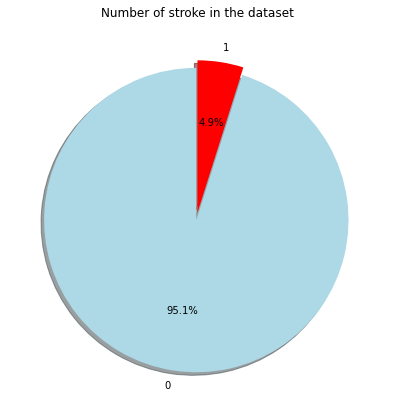

In [3]:
#Plotting target feature
import matplotlib.pyplot as plt
labels =df['stroke'].value_counts(sort = True).index
sizes = df['stroke'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Number of stroke in the dataset')
plt.show()

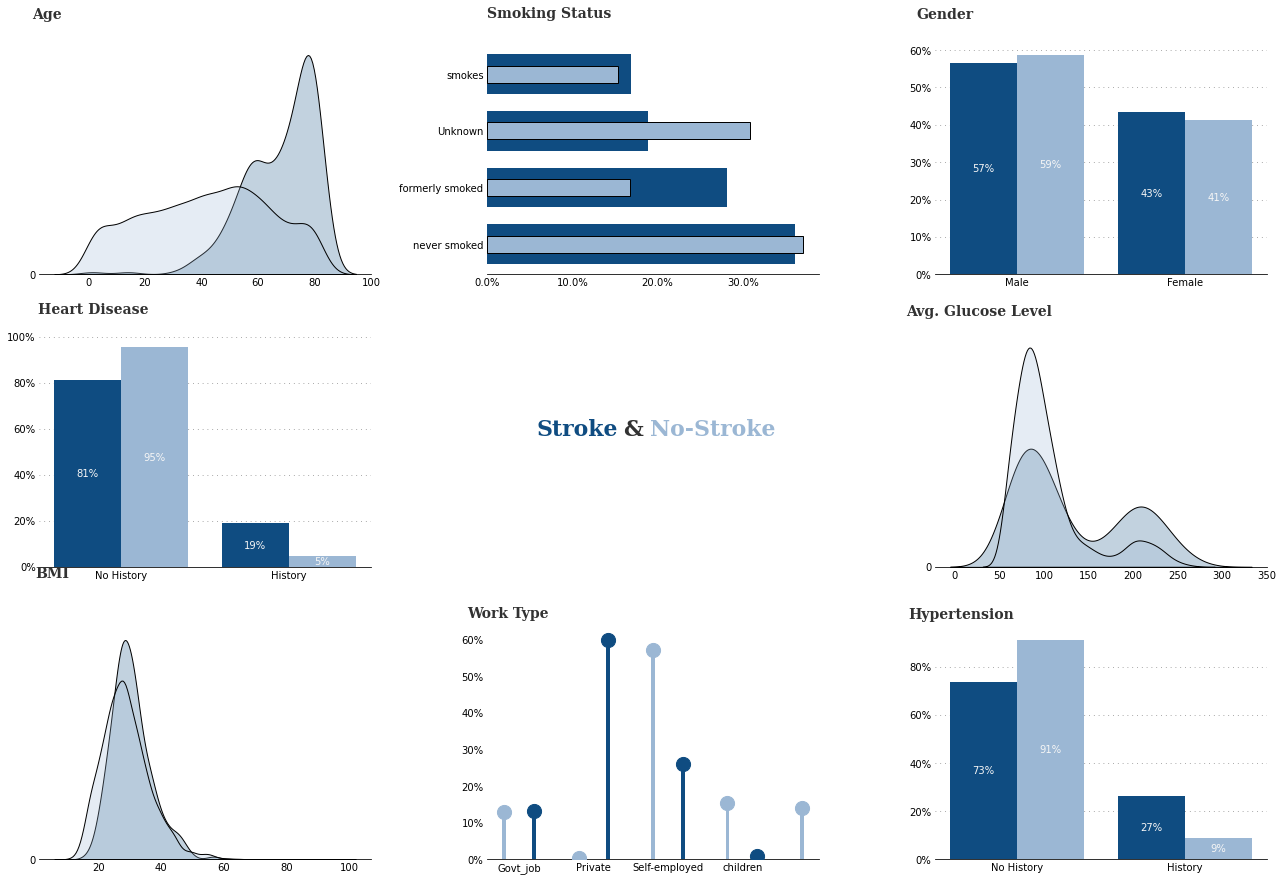

In [4]:
#EDA(Exploratory Data Analysis)

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score


str_only = df[df['stroke'] == 1]
no_str_only = df[df['stroke'] == 0]
no_str_only = no_str_only[(no_str_only['gender'] != 'Other')]

fig = plt.figure(figsize=(22,15))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.35, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])

background_color = "white"
fig.patch.set_facecolor(background_color) # figure background color


# Plots

## Age


ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
positive = pd.DataFrame(str_only["age"])
negative = pd.DataFrame(no_str_only["age"])
sns.kdeplot(positive["age"], ax=ax0,color="#0f4c81", shade=True,ec="black",label="positive")
sns.kdeplot(negative["age"], ax=ax0, color="#9bb7d4", shade=True, ec='black',label="negative")
#ax3.text(0.29, 13, 'Age', 
 #        fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax0.yaxis.set_major_locator(mtick.MultipleLocator(2))
ax0.set_ylabel('')    
ax0.set_xlabel('')
ax0.text(-20, 0.0465, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")


# Smoking
positive = pd.DataFrame(str_only["smoking_status"].value_counts())
positive["Percentage"] = positive["smoking_status"].apply(lambda x: x/sum(positive["smoking_status"])*100)
negative = pd.DataFrame(no_str_only["smoking_status"].value_counts())
negative["Percentage"] = negative["smoking_status"].apply(lambda x: x/sum(negative["smoking_status"])*100)

ax1.text(0, 4, 'Smoking Status', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax1.barh(positive.index, positive['Percentage'], color="#0f4c81", zorder=3, height=0.7)
ax1.barh(negative.index, negative['Percentage'], color="#9bb7d4", zorder=3,ec='black', height=0.3)
ax1.xaxis.set_major_formatter(mtick.PercentFormatter())
ax1.xaxis.set_major_locator(mtick.MultipleLocator(10))

##
# Ax2 - GENDER 
positive = pd.DataFrame(str_only["gender"].value_counts())
positive["Percentage"] = positive["gender"].apply(lambda x: x/sum(positive["gender"])*100)
negative = pd.DataFrame(no_str_only["gender"].value_counts())
negative["Percentage"] = negative["gender"].apply(lambda x: x/sum(negative["gender"])*100)

x = np.arange(len(positive))
ax2.text(-0.4, 68.5, 'Gender', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax2.bar(x, height=positive["Percentage"], zorder=3, color="#0f4c81", width=0.4)
ax2.bar(x+0.4, height=negative["Percentage"], zorder=3, color="#9bb7d4", width=0.4)
ax2.set_xticks(x + 0.4 / 2)
ax2.set_xticklabels(['Male','Female'])
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_locator(mtick.MultipleLocator(10))
for i,j in zip([0, 1], positive["Percentage"]):
    ax2.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], negative["Percentage"]):
    ax2.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')

    

# Heart Dis

positive = pd.DataFrame(str_only["heart_disease"].value_counts())
positive["Percentage"] = positive["heart_disease"].apply(lambda x: x/sum(positive["heart_disease"])*100)
negative = pd.DataFrame(no_str_only["heart_disease"].value_counts())
negative["Percentage"] = negative["heart_disease"].apply(lambda x: x/sum(negative["heart_disease"])*100)

x = np.arange(len(positive))
ax3.text(-0.3, 110, 'Heart Disease', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax3.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax3.bar(x, height=positive["Percentage"], zorder=3, color="#0f4c81", width=0.4)
ax3.bar(x+0.4, height=negative["Percentage"], zorder=3, color="#9bb7d4", width=0.4)
ax3.set_xticks(x + 0.4 / 2)
ax3.set_xticklabels(['No History','History'])
ax3.yaxis.set_major_formatter(mtick.PercentFormatter())
ax3.yaxis.set_major_locator(mtick.MultipleLocator(20))
for i,j in zip([0, 1], positive["Percentage"]):
    ax3.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], negative["Percentage"]):
    ax3.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
    

## AX4 - TITLE

ax4.spines["bottom"].set_visible(False)
ax4.tick_params(left=False, bottom=False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
#ax4.text(0.5, 0.6, 'Can we see patterns for\n\n patients in our data?', horizontalalignment='center', verticalalignment='center',
 #        fontsize=22, fontweight='bold', fontfamily='serif', color="#323232")

ax4.text(0.15,0.57,"Stroke", fontweight="bold", fontfamily='serif', fontsize=22, color='#0f4c81')
ax4.text(0.41,0.57,"&", fontweight="bold", fontfamily='serif', fontsize=22, color='#323232')
ax4.text(0.49,0.57,"No-Stroke", fontweight="bold", fontfamily='serif', fontsize=22, color='#9bb7d4')


# Glucose

ax5.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
positive = pd.DataFrame(str_only["avg_glucose_level"])
negative = pd.DataFrame(no_str_only["avg_glucose_level"])
sns.kdeplot(positive["avg_glucose_level"], ax=ax5,color="#0f4c81",ec='black', shade=True, label="positive")
sns.kdeplot(negative["avg_glucose_level"], ax=ax5, color="#9bb7d4", ec='black',shade=True, label="negative")
ax5.text(-55, 0.01855, 'Avg. Glucose Level', 
         fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax5.yaxis.set_major_locator(mtick.MultipleLocator(2))
ax5.set_ylabel('')    
ax5.set_xlabel('')



## BMI


ax6.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
positive = pd.DataFrame(str_only["bmi"])
negative = pd.DataFrame(no_str_only["bmi"])
sns.kdeplot(positive["bmi"], ax=ax6,color="#0f4c81", ec='black',shade=True, label="positive")
sns.kdeplot(negative["bmi"], ax=ax6, color="#9bb7d4",ec='black', shade=True, label="negative")
ax6.text(-0.06, 0.09, 'BMI', 
         fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax6.yaxis.set_major_locator(mtick.MultipleLocator(2))
ax6.set_ylabel('')    
ax6.set_xlabel('')


# Work Type

positive = pd.DataFrame(str_only["work_type"].value_counts())
positive["Percentage"] = positive["work_type"].apply(lambda x: x/sum(positive["work_type"])*100)
positive = positive.sort_index()

negative = pd.DataFrame(no_str_only["work_type"].value_counts())
negative["Percentage"] = negative["work_type"].apply(lambda x: x/sum(negative["work_type"])*100)
negative = negative.sort_index()

ax7.bar(negative.index, height=negative["Percentage"], zorder=3, color="#9bb7d4", width=0.05)
ax7.scatter(negative.index, negative["Percentage"], zorder=3,s=200, color="#9bb7d4")
ax7.bar(np.arange(len(positive.index))+0.4, height=positive["Percentage"], zorder=3, color="#0f4c81", width=0.05)
ax7.scatter(np.arange(len(positive.index))+0.4, positive["Percentage"], zorder=3,s=200, color="#0f4c81")

ax7.yaxis.set_major_formatter(mtick.PercentFormatter())
ax7.yaxis.set_major_locator(mtick.MultipleLocator(10))
ax7.set_xticks(np.arange(len(positive.index))+0.4 / 2)
ax7.set_xticklabels(list(positive.index),rotation=0)
ax7.text(-0.5, 66, 'Work Type', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")



# hypertension

positive = pd.DataFrame(str_only["hypertension"].value_counts())
positive["Percentage"] = positive["hypertension"].apply(lambda x: x/sum(positive["hypertension"])*100)
negative = pd.DataFrame(no_str_only["hypertension"].value_counts())
negative["Percentage"] = negative["hypertension"].apply(lambda x: x/sum(negative["hypertension"])*100)

x = np.arange(len(positive))
ax8.text(-0.45, 100, 'Hypertension', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax8.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax8.bar(x, height=positive["Percentage"], zorder=3, color="#0f4c81", width=0.4)
ax8.bar(x+0.4, height=negative["Percentage"], zorder=3, color="#9bb7d4", width=0.4)
ax8.set_xticks(x + 0.4 / 2)
ax8.set_xticklabels(['No History','History'])
ax8.yaxis.set_major_formatter(mtick.PercentFormatter())
ax8.yaxis.set_major_locator(mtick.MultipleLocator(20))
for i,j in zip([0, 1], positive["Percentage"]):
    ax8.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], negative["Percentage"]):
    ax8.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')


# tidy up



for s in ["top","right","left"]:
    for i in range(0,9):
        locals()["ax"+str(i)].spines[s].set_visible(False)
        
for i in range(0,9):
        locals()["ax"+str(i)].set_facecolor(background_color)
        locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both',length=0)
        locals()["ax"+str(i)].set_facecolor(background_color) 

        
plt.show()

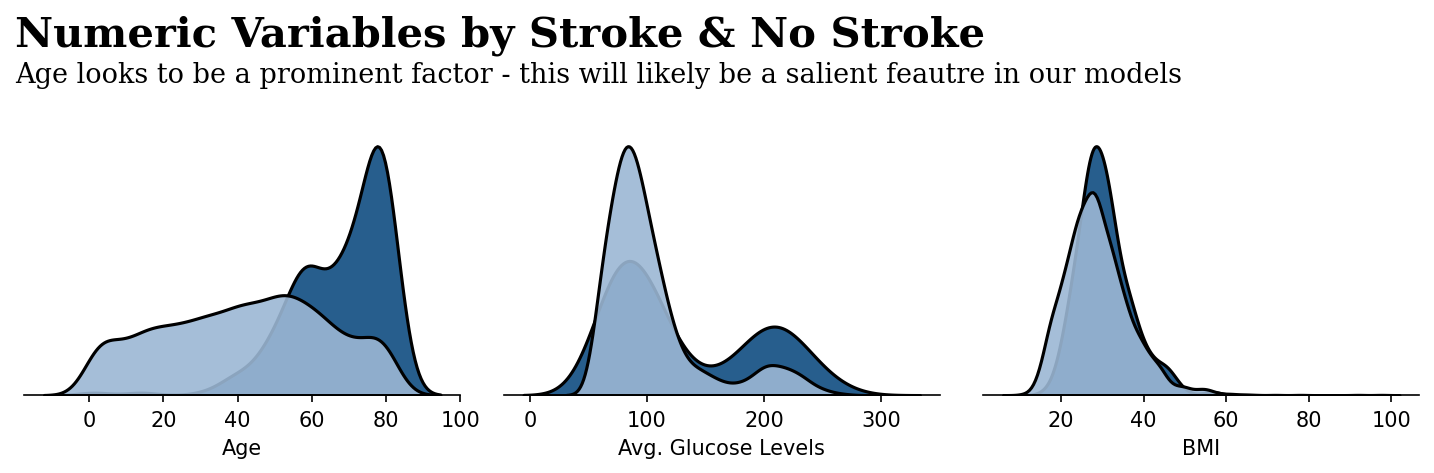

In [5]:
fig = plt.figure(figsize=(12, 12), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)

conts = ['age','avg_glucose_level','bmi']
plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0

s = df[df['stroke'] == 1]
ns = df[df['stroke'] == 0]

for feature in conts:
        sns.kdeplot(s[feature], ax=locals()["ax"+str(plot)], color='#0f4c81', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        sns.kdeplot(ns[feature],ax=locals()["ax"+str(plot)], color='#9bb7d4', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='white', linestyle=':', dashes=(1,5))
        #locals()["ax"+str(plot)].set_xlabel(feature)
        plot += 1

ax0.set_xlabel('Age')
ax1.set_xlabel('Avg. Glucose Levels')
ax2.set_xlabel('BMI')
        
ax0.text(-20, 0.056, 'Numeric Variables by Stroke & No Stroke', fontsize=20, fontweight='bold', fontfamily='serif')
ax0.text(-20, 0.05, 'Age looks to be a prominent factor - this will likely be a salient feautre in our models', 
         fontsize=13, fontweight='light', fontfamily='serif')

plt.show()

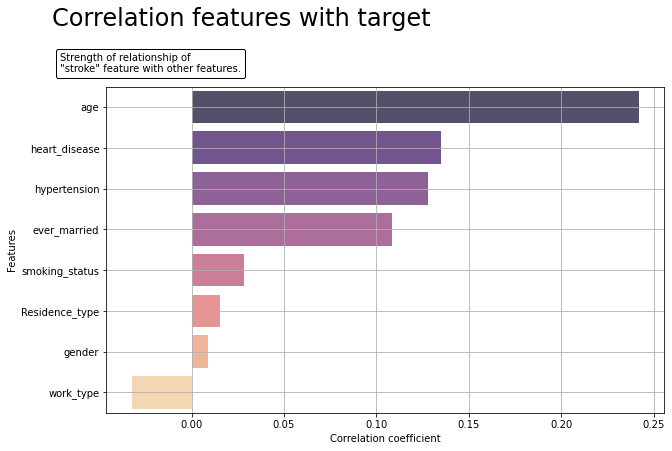

In [6]:
#Target and Feature Correlation

le = LabelEncoder()
en_df = df.apply(le.fit_transform)

features=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type',
       'smoking_status']
from matplotlib.offsetbox import AnchoredText
correlation_table = []
for cols in features:
    y = en_df["stroke"]
    x = en_df[cols]
    corr = np.corrcoef(x, y)[1][0]
    dict ={
        'Features': cols,
        'Correlation coefficient' : corr,
        'Feat_type': 'numerical'
    }
    correlation_table.append(dict)
dF1 = pd.DataFrame(correlation_table)
fig = plt.figure(figsize=(10,6), facecolor='white')
ax = sns.barplot(x="Correlation coefficient", y="Features", 
                     data=dF1.sort_values("Correlation coefficient", ascending=False),
                     palette='magma', alpha=0.75)
ax.grid()
#ax.set_title("Correlation of numerical features with Target", fontsize=20, y=1.05)

title =  'Correlation features with target'
sub_title = 'Strength of relationship of \
\n"stroke" feature with other features.'

plt.gcf().text(0.05, 1.02, title, fontsize=24)
#plt.gcf().text(0.05, 0.9, sub_title, fontsize=14)

at1 = AnchoredText(sub_title,
                   loc='lower left', frameon=True,
                   bbox_to_anchor=(-0.1, 1.01),
                   bbox_transform=ax.transAxes,
                   #prop=dict(size=8),
                   )
at1.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at1)

In [7]:
#Mean Imputation
df.bmi.replace(to_replace=np.nan, value=df.bmi.mean(), inplace=True)

In [8]:
#Converting Categorical Data to Numerical
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers= [('encoder', OneHotEncoder(), [0,5,9])], remainder= 'passthrough')
X = np.array(ct.fit_transform(X))

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 15] = le.fit_transform(X[:, 15])
X[:, 16] = le.fit_transform(X[:, 16])

Before OverSampling, counts of label '1': 249
Before OverSampling, counts of label '0': 4861 

After OverSampling, counts of label '1': 3889
After OverSampling, counts of label '0': 3889


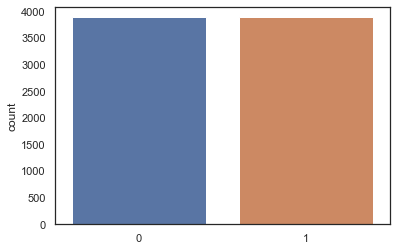

In [23]:
#SMOTE(Synthetic Minority Oversampling) Process

#X , y = df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi']],df["stroke"]
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek 

sc = StandardScaler()
X = sc.fit_transform(X)


x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
#x_test = sc.transform(x_test)

sm = SMOTE()
X_res, y_res = sm.fit_resample(x_train,y_train)
#X_test_smote, y_test_smote = sm.fit_resample(x_test, y_test)



print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

#print('After OverSampling, the shape of train_X: {}'.format(X_res.shape))
#print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res==0)))

sns.countplot(x = y_res, data = df)
plt.savefig('stroke_oversampled.png')

#print("Before smote:",Counter(y_train))
#print("After smote:",Counter(y_res))




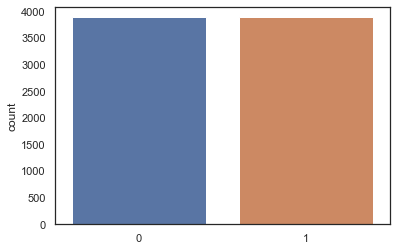

In [22]:
sns.countplot(x = y_res, data = df)
plt.savefig('stroke_oversampled.png')

RandomForestClassifier():

Accuracy Score:  0.9041095890410958

Precision: 0.12

Recall: 0.16

F1: 0.14

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       972
           1       0.12      0.16      0.14        50

    accuracy                           0.90      1022
   macro avg       0.54      0.55      0.54      1022
weighted avg       0.92      0.90      0.91      1022




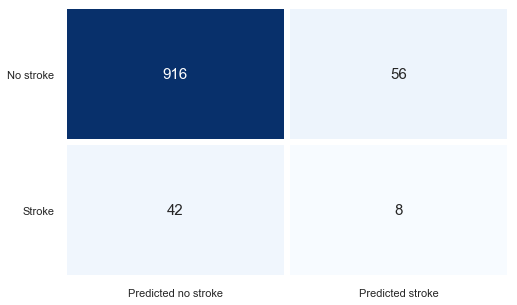

ROC AUC score: 0.7804938271604938


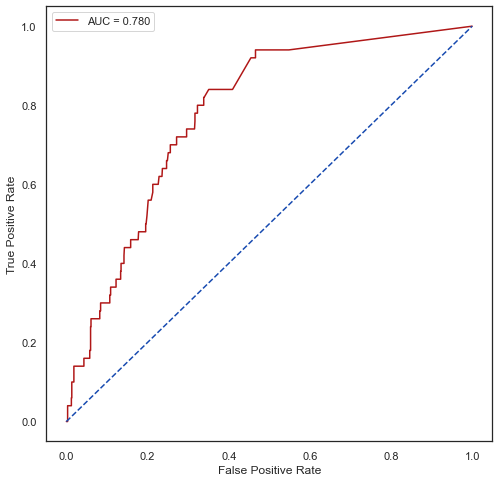


              precision    recall  f1-score   support

           0       0.96      0.94      0.95       972
           1       0.12      0.16      0.14        50

    accuracy                           0.90      1022
   macro avg       0.54      0.55      0.54      1022
weighted avg       0.92      0.90      0.91      1022


KNeighborsClassifier():

KNeighborsClassifier():

Accuracy Score:  0.8101761252446184

Precision: 0.08

Recall: 0.28

F1: 0.13

              precision    recall  f1-score   support

           0       0.96      0.84      0.89       972
           1       0.08      0.28      0.13        50

    accuracy                           0.81      1022
   macro avg       0.52      0.56      0.51      1022
weighted avg       0.91      0.81      0.86      1022




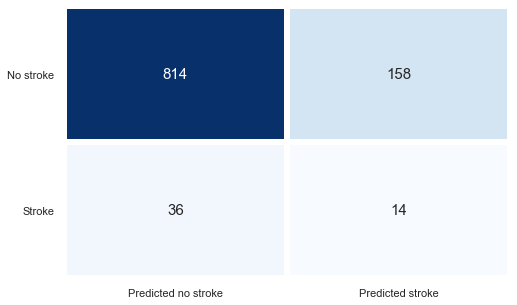

ROC AUC score: 0.6504218106995885


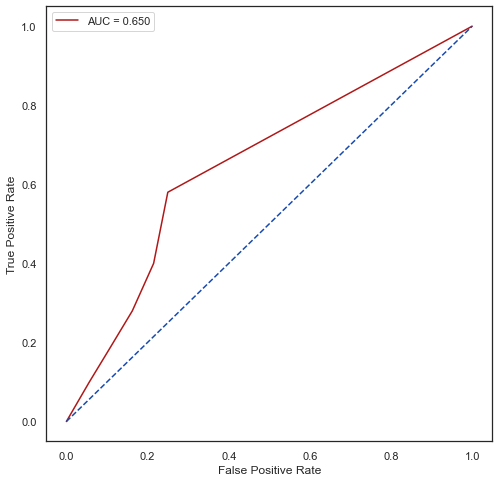

DecisionTreeClassifier():


Accuracy Score:  0.87573385518591

Precision: 0.13

Recall: 0.28

F1: 0.18

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       972
           1       0.13      0.28      0.18        50

    accuracy                           0.88      1022
   macro avg       0.55      0.59      0.56      1022
weighted avg       0.92      0.88      0.90      1022




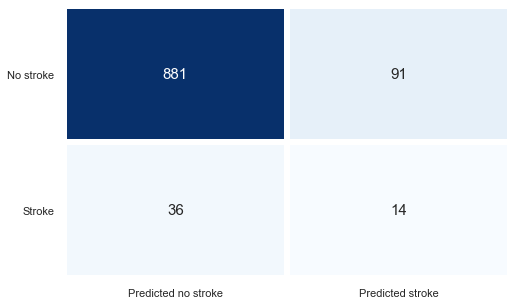

ROC AUC score: 0.5931893004115226


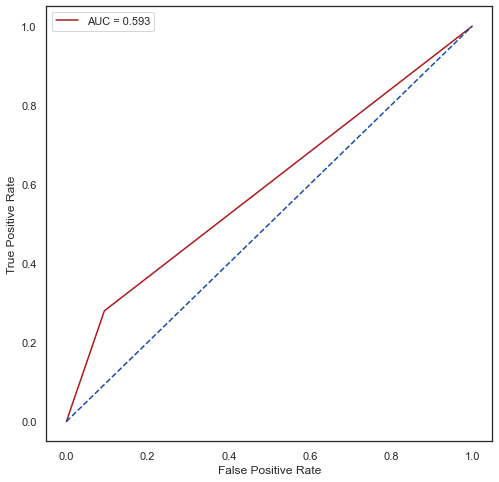


LogisticRegression():


Accuracy Score:  0.7485322896281801

Precision: 0.14

Recall: 0.78

F1: 0.23

              precision    recall  f1-score   support

           0       0.99      0.75      0.85       972
           1       0.14      0.78      0.23        50

    accuracy                           0.75      1022
   macro avg       0.56      0.76      0.54      1022
weighted avg       0.94      0.75      0.82      1022




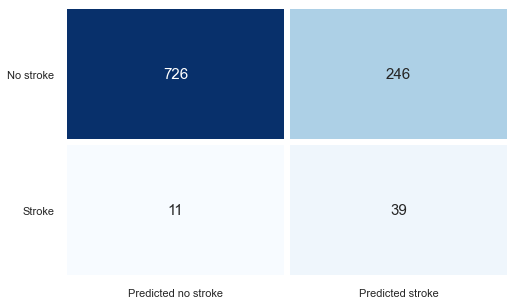

ROC AUC score: 0.8442798353909464


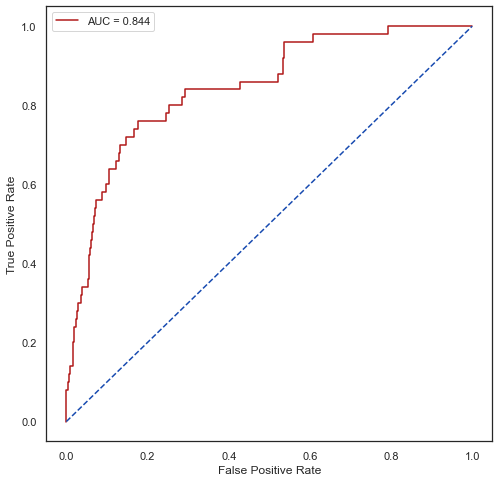


SVM():



KeyboardInterrupt: 

In [21]:
#Building and testing machine learning models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

model =  RandomForestClassifier(criterion='gini', max_depth= 50, min_samples_split= 5, n_estimators=20, random_state= 0)
model.fit(X_res, y_res)
y_pred = model.predict(x_test)
precision = precision_score(y_test, y_pred)  #Precision Score
recall = recall_score(y_test, y_pred)  #Recall Score
f1 = f1_score(y_test, y_pred)

print('RandomForestClassifier():')
print('')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))
print('')
print('Precision: {:.2f}'.format(precision))
print('')
print('Recall: {:.2f}'.format(recall))
print('')
print('F1: {:.2f}'.format(f1))
print('')
print(metrics.classification_report(y_test, y_pred))


print('')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

y_prob = model.predict_proba(x_test)[:,1]
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()
print('')
print(metrics.classification_report(y_test, y_pred))
print('')
print('KNeighborsClassifier():')
print('')
model =  KNeighborsClassifier()
model.fit(X_res, y_res)
y_pred = model.predict(x_test)
#cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
#accuracies = cross_val_score(estimator = model, X = X_res, y = y_res, cv = 10)
precision = precision_score(y_test, y_pred)  #Precision Score
recall = recall_score(y_test, y_pred)  #Recall Score
f1 = f1_score(y_test, y_pred)
print('KNeighborsClassifier():')
print('')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))
print('')
print('Precision: {:.2f}'.format(precision))
print('')
print('Recall: {:.2f}'.format(recall))
print('')
print('F1: {:.2f}'.format(f1))
print('')
print(metrics.classification_report(y_test, y_pred))
print('')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

y_prob = model.predict_proba(x_test)[:,1]
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()


print('DecisionTreeClassifier():')
print('')
model =  DecisionTreeClassifier()
model.fit(X_res, y_res)
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
accuracies = cross_val_score(estimator = model, X = X_res, y = y_res, cv = 10)
precision = precision_score(y_test, y_pred)  #Precision Score
recall = recall_score(y_test, y_pred)  #Recall Score
f1 = f1_score(y_test, y_pred)
print('')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))
print('')
print('Precision: {:.2f}'.format(precision))
print('')
print('Recall: {:.2f}'.format(recall))
print('')
print('F1: {:.2f}'.format(f1))
print('')
print(metrics.classification_report(y_test, y_pred))
print('')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()


y_prob = model.predict_proba(x_test)[:,1]
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()


print('')
print('LogisticRegression():')
print('')
model =  LogisticRegression()
model.fit(X_res, y_res)
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
accuracies = cross_val_score(estimator = model, X = X_res, y = y_res, cv = 10)
precision = precision_score(y_test, y_pred)  #Precision Score
recall = recall_score(y_test, y_pred)  #Recall Score
f1 = f1_score(y_test, y_pred)
print('')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))
print('')
print('Precision: {:.2f}'.format(precision))
print('')
print('Recall: {:.2f}'.format(recall))
print('')
print('F1: {:.2f}'.format(f1))
print('')
print(metrics.classification_report(y_test, y_pred))
print('')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()


y_prob = model.predict_proba(x_test)[:,1]
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

print('')
print('SVM():')
print('')
model =  SVC(probability=True)
model.fit(X_res, y_res)
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
accuracies = cross_val_score(estimator = model, X = X_res, y = y_res, cv = 10)
precision = precision_score(y_test, y_pred)  #Precision Score
recall = recall_score(y_test, y_pred)  #Recall Score
f1 = f1_score(y_test, y_pred)
print('')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))
print('')
print('Precision: {:.2f}'.format(precision))
print('')
print('Recall: {:.2f}'.format(recall))
print('')
print('F1: {:.2f}'.format(f1))
print('')
print(metrics.classification_report(y_test, y_pred))
print('')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()


y_prob = model.predict_proba(x_test)[:,1]
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()



In [11]:
#Hyperparameter tuning using Grid Search

from sklearn.model_selection import GridSearchCV

grid_models = [(KNeighborsClassifier(),[{'n_neighbors':[1], 
                                       'metric': ['manhattan'],
                                      'p': [1],
                                      'weights': ['uniform']}]),  
               (RandomForestClassifier(),[{'n_estimators':[20],
                                           'criterion':['gini'],
                                           'random_state':[0],
                                           'min_samples_split':[5],
                                           'max_depth':[50]
                                           
                                           }]),
            (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],
                                        'random_state':[0],
                                        'splitter':['best']
                                        }]),
              (LogisticRegression(),[{#'penalty': ['l1', 'l2','none'],
                                      #'C':[1],
                                      'random_state':[0],
                                      'penalty': ['l2'],
                                   'C': [0.01],
                                'solver': ['lbfgs'],
                                 'max_iter':[400]
                                         
                                }]),
               (SVC(),[{'C':[1],
                        'kernel':['rbf'],
                        'random_state':[1],
                    'gamma': [1]}])]

KNeighborsClassifier():
Best Accuracy : 95.09%
Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}

----------------

{}:
Accuracy Score : 0.8874755381604696

Precision: 0.11

Recall: 0.18

F1: 0.14


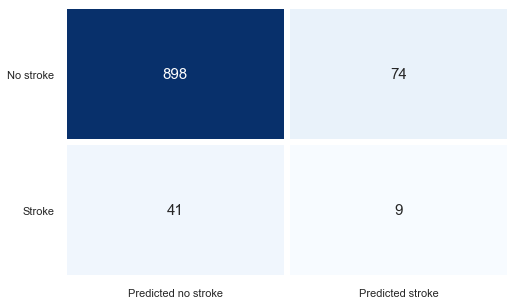

RandomForestClassifier():
Best Accuracy : 95.35%
Best Parameters :  {'criterion': 'gini', 'max_depth': 50, 'min_samples_split': 5, 'n_estimators': 20, 'random_state': 0}

----------------

{}:
Accuracy Score : 0.9041095890410958

Precision: 0.12

Recall: 0.16

F1: 0.14


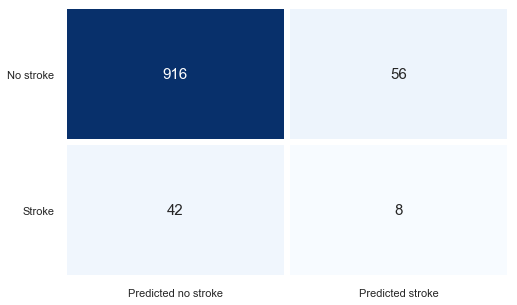

DecisionTreeClassifier():
Best Accuracy : 90.85%
Best Parameters :  {'criterion': 'entropy', 'random_state': 0, 'splitter': 'best'}

----------------

{}:
Accuracy Score : 0.863013698630137

Precision: 0.12

Recall: 0.28

F1: 0.17


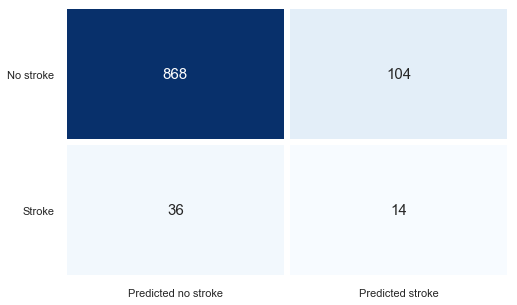

LogisticRegression():
Best Accuracy : 79.66%
Best Parameters :  {'C': 0.01, 'max_iter': 400, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs'}

----------------

{}:
Accuracy Score : 0.7465753424657534

Precision: 0.14

Recall: 0.80

F1: 0.24


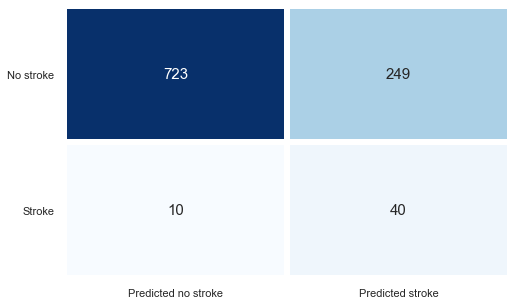

SVC():
Best Accuracy : 94.19%
Best Parameters :  {'C': 1, 'gamma': 1, 'kernel': 'rbf', 'random_state': 1}

----------------

{}:
Accuracy Score : 0.8688845401174168

Precision: 0.07

Recall: 0.14

F1: 0.09


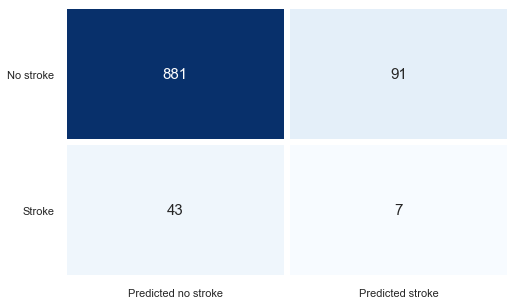

In [12]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
   #grid.fit(X_res, y_res)
    fitting=grid.fit(X_res, y_res)
    y_pred_tune =fitting.predict(x_test)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')
    print('{}:\nAccuracy Score :', metrics.accuracy_score(y_test, y_pred_tune))
    precision = precision_score(y_test, y_pred_tune)  #Precision Score
    recall = recall_score(y_test, y_pred_tune)  #Recall Score
    f1 = f1_score(y_test, y_pred_tune)
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('')
    print('Recall: {:.2f}'.format(recall))
    print('')
    print('F1: {:.2f}'.format(f1))
    cm = confusion_matrix(y_test, y_pred_tune)
    plt.figure(figsize = (8, 5))
    sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
    yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
    plt.yticks(rotation = 0)
    plt.show()
    
    


In [13]:

#random forest: 'bootstrap': False, 'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150, 'random_state': 0

In [ ]:
#Testing models using tuned parameters

model =  RandomForestClassifier(criterion='gini', max_depth= 50, min_samples_split= 5, n_estimators=20, random_state= 0)
model.fit(X_res, y_res)
y_pred = model.predict(x_test)
precision = precision_score(y_test, y_pred)  #Precision Score
recall = recall_score(y_test, y_pred)  #Recall Score
f1 = f1_score(y_test, y_pred)

print('RandomForestClassifier():')
print('')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))
print('')
print('Precision: {:.2f}'.format(precision))
print('')
print('Recall: {:.2f}'.format(recall))
print('')
print('F1: {:.2f}'.format(f1))
print('')
print(metrics.classification_report(y_test, y_pred))


print('')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

y_prob = model.predict_proba(x_test)[:,1]
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

print('')
print('KNeighborsClassifier():')
print('')
model =  KNeighborsClassifier(metric= 'manhattan', n_neighbors= 1, p= 1, weights='uniform')
model.fit(X_res, y_res)
y_pred = model.predict(x_test)
#cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
#accuracies = cross_val_score(estimator = model, X = X_res, y = y_res, cv = 10)
precision = precision_score(y_test, y_pred)  #Precision Score
recall = recall_score(y_test, y_pred)  #Recall Score
f1 = f1_score(y_test, y_pred)
print('KNeighborsClassifier():')
print('')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))
print('')
print('Precision: {:.2f}'.format(precision))
print('')
print('Recall: {:.2f}'.format(recall))
print('')
print('F1: {:.2f}'.format(f1))
print('')
print(metrics.classification_report(y_test, y_pred))


print('')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

y_prob = model.predict_proba(x_test)[:,1]
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()


print('DecisionTreeClassifier():')
print('')
model =  DecisionTreeClassifier(criterion= 'entropy', random_state= 0, splitter= 'best')
model.fit(X_res, y_res)
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
accuracies = cross_val_score(estimator = model, X = X_res, y = y_res, cv = 10)
precision = precision_score(y_test, y_pred)  #Precision Score
recall = recall_score(y_test, y_pred)  #Recall Score
f1 = f1_score(y_test, y_pred)
print('')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))
print('')
print('Precision: {:.2f}'.format(precision))
print('')
print('Recall: {:.2f}'.format(recall))
print('')
print('F1: {:.2f}'.format(f1))
print('')
print(metrics.classification_report(y_test, y_pred))


print('')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()


y_prob = model.predict_proba(x_test)[:,1]
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()


print('')
print('LogisticRegression():')
print('')
model =  LogisticRegression(C= 0.01, max_iter= 400, penalty='l2', random_state= 0, solver='lbfgs')
model.fit(X_res, y_res)
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
accuracies = cross_val_score(estimator = model, X = X_res, y = y_res, cv = 10)
precision = precision_score(y_test, y_pred)  #Precision Score
recall = recall_score(y_test, y_pred)  #Recall Score
f1 = f1_score(y_test, y_pred)
print('')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))
print('')
print('Precision: {:.2f}'.format(precision))
print('')
print('Recall: {:.2f}'.format(recall))
print('')
print('F1: {:.2f}'.format(f1))
print('')
print(metrics.classification_report(y_test, y_pred))


print('')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()


y_prob = model.predict_proba(x_test)[:,1]
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

print('')
print('SVM():')
print('')
model =  SVC(probability=True,C= 1, gamma= 1, kernel= 'rbf', random_state= 1)
model.fit(X_res, y_res)
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
accuracies = cross_val_score(estimator = model, X = X_res, y = y_res, cv = 10)
precision = precision_score(y_test, y_pred)  #Precision Score
recall = recall_score(y_test, y_pred)  #Recall Score
f1 = f1_score(y_test, y_pred)
print('')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))
print('')
print('Precision: {:.2f}'.format(precision))
print('')
print('Recall: {:.2f}'.format(recall))
print('')
print('F1: {:.2f}'.format(f1))
print('')
print(metrics.classification_report(y_test, y_pred))


print('')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()


y_prob = model.predict_proba(x_test)[:,1]
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

